# Import Libraries

In [7]:
import os
import shap
import mlflow
import joblib
import numpy as np
from mlflow.tracking import MlflowClient

# Load Data

In [2]:
X_train, X_test, Y_train, Y_test = joblib.load("../data/processed/split_data.pkl") 

# Load Final Production Model

In [3]:
mlruns_path = os.path.abspath("../mlruns")
mlflow.set_tracking_uri(f"file:..///{mlruns_path}")
client = MlflowClient()
model_name = "Final XGB + SMOTE Tuned Model"
latest_version = client.get_latest_versions(model_name, stages=["Production"])[0].version
model_uri = f"models:/{model_name}/{latest_version}"
model = mlflow.sklearn.load_model(model_uri)
print(f"Loaded model from {model_uri}")

C:\Users\raira\AppData\Local\Temp\ipykernel_26928\3030497878.py:5: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  latest_version = client.get_latest_versions(model_name, stages=["Production"])[0].version


Loaded model from models:/Final XGB + SMOTE Tuned Model/1


# Compute SHAP values

PermutationExplainer explainer: 56963it [1:43:33,  9.16it/s]                             
C:\Users\raira\AppData\Local\Temp\ipykernel_26928\4044108952.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)


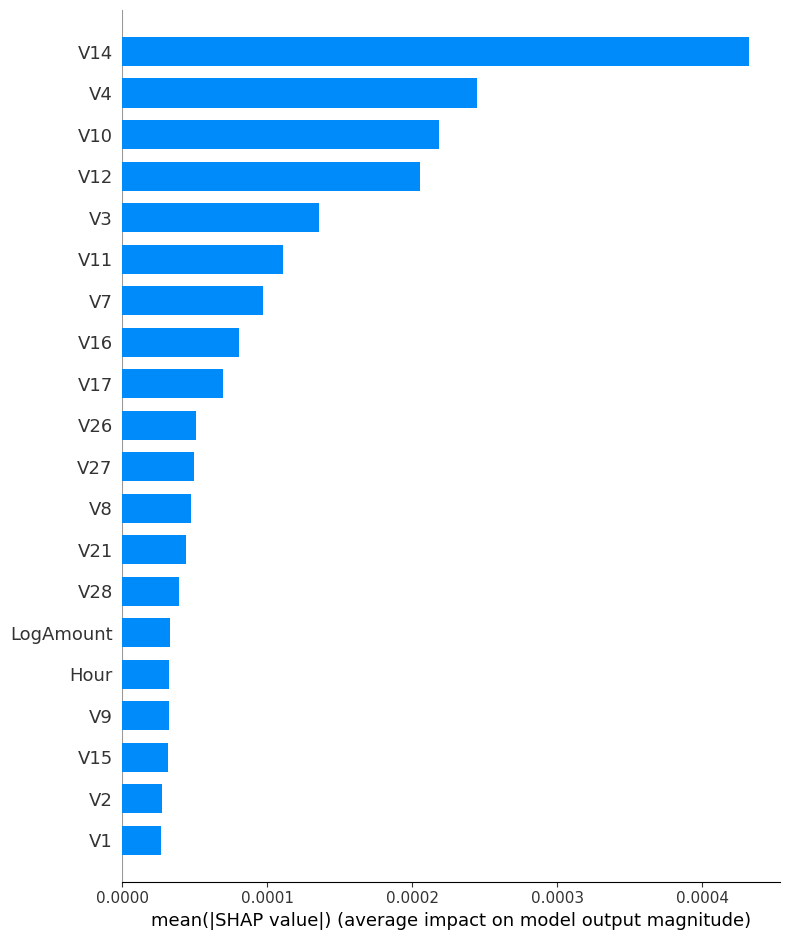

In [4]:
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)

# Global Interpretability

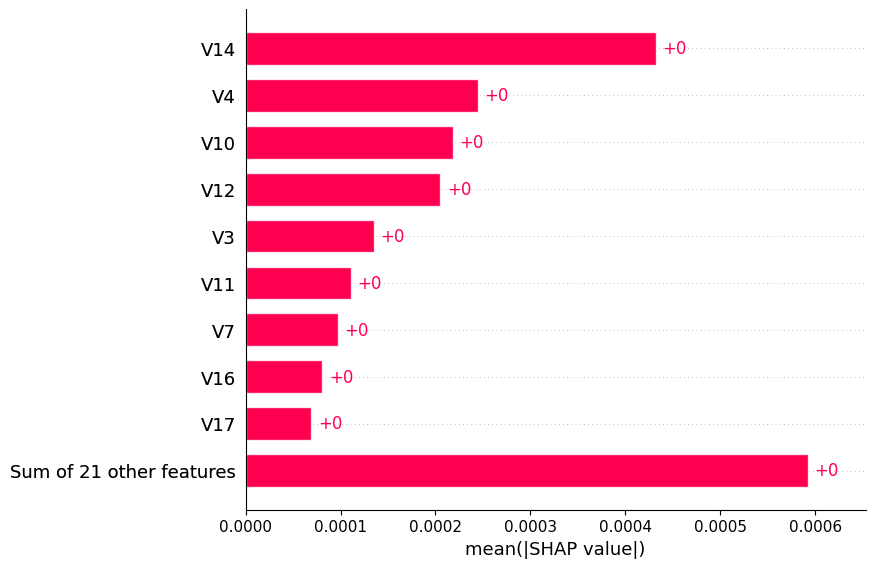

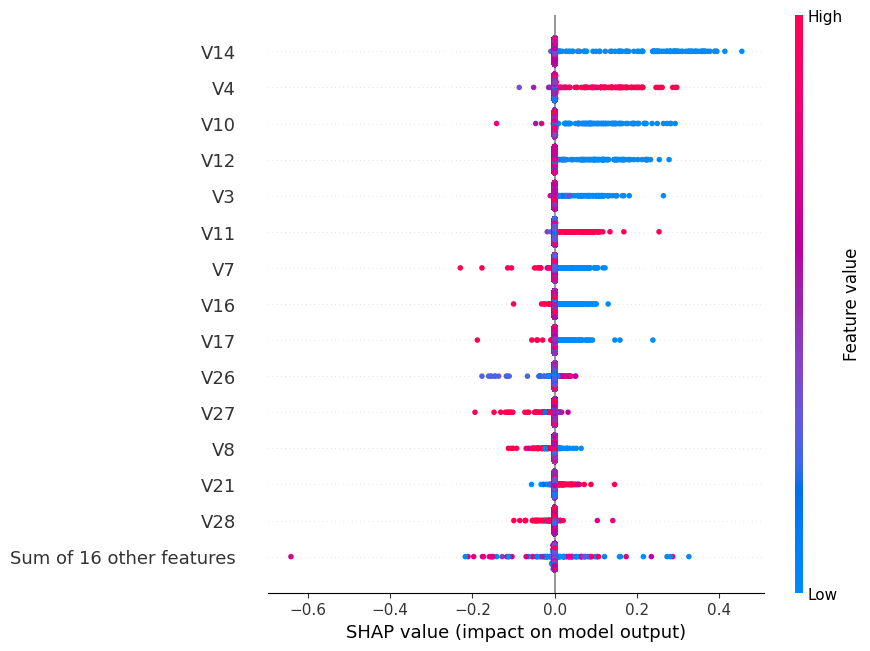

In [5]:
shap.plots.bar(shap_values, max_display=10)
shap.plots.beeswarm(shap_values, max_display=15)

# Feature Dependence Plots

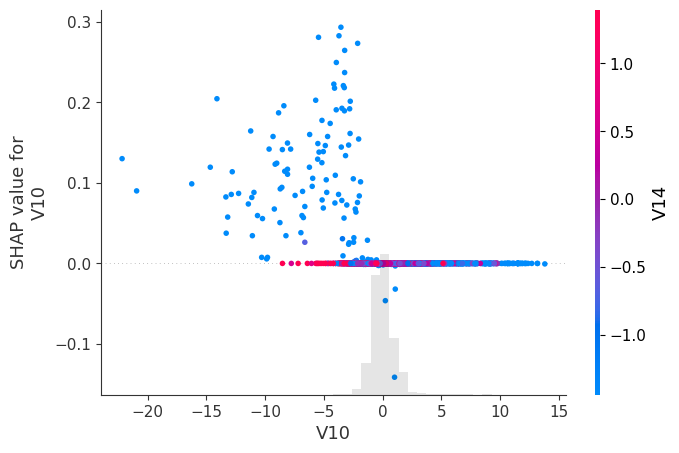

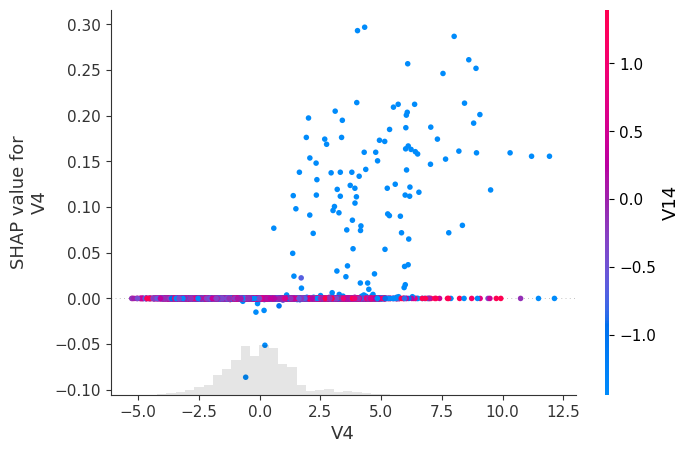

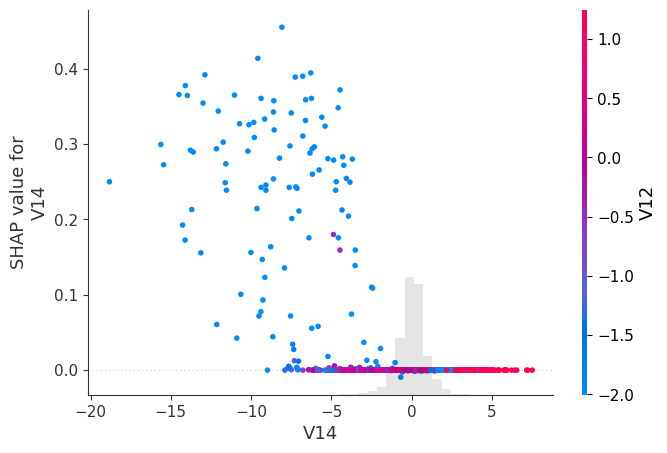

In [6]:
top_features = np.argsort(np.abs(shap_values.values).mean(0))[-3:]
for idx in top_features:
    shap.plots.scatter(shap_values[:, idx], color=shap_values)

# Deploy Production MLflow model to ONXX for Real-time Inference Capability

# Model Explainability Insights

- **SHAP Global Insights**:
    - `V14`, `V4`, `V10`, and `V12` are the most influential features in predicting fraud.
    - Bar and beeswarm plots reveal both magnitude and direction of influence.
    - Feature impact aligns with fraud behavior patterns captured in anonymized financial variables.

- **Feature Dependence & Interaction**:
    - Top features show non-linear impact across value ranges.
    - Dependence plots revealed key interactions (e.g., `V10` with `V14`) that support the complexity of fraudulent behavior.

- **Technical Depth & Relevance**:
    - Used model-agnostic SHAP explainability for production-grade XGBoost + SMOTE model.
    - Clear integration with MLflow and reproducible experiments aligns with MLOps best practices.
    - The SHAP analysis strengthens trust in the model's decisions and readiness for deployment in high-stakes financial environments.

- **Next Steps for Streamlit App**:
    - Incorporate **LIME** for complementary local interpretability.
    - Use insights to inform future feature engineering and threshold policies for cost-sensitive fraud handling.

---